In [1]:
# =============================================================
# 🌾 PLANT DISEASE DETECTION (42 Classes)
# ✅ One-Step Full Training Script using MobileNetV2
# Dataset: jawadali1045/20k-multi-class-crop-disease-images
# =============================================================

# --- 1. SETUP AND IMPORTS ---
print("🔧 Setting up environment...")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os

print(f"✅ TensorFlow Version: {tf.__version__}")
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# --- 2. CONNECT GOOGLE DRIVE ---
from google.colab import drive
drive.mount('/content/drive')

# --- 3. KAGGLE API DOWNLOAD AUTOMATION ---
from google.colab import files

print("\n📥 Upload your Kaggle API key (kaggle.json)...")
uploaded = files.upload()  # prompts you to upload kaggle.json file

!mkdir -p ~/.kaggle
!cp k


🔧 Setting up environment...
✅ TensorFlow Version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mounted at /content/drive

📥 Upload your Kaggle API key (kaggle.json)...


Saving kaggle.json to kaggle (1).json
cp: missing destination file operand after 'k'
Try 'cp --help' for more information.


!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d "jawadali1045/20k-multi-class-crop-disease-images"


Dataset URL: https://www.kaggle.com/datasets/jawadali1045/20k-multi-class-crop-disease-images
License(s): CC0-1.0
100% 2.33G/2.34G [00:22<00:00, 334MB/s]
100% 2.34G/2.34G [00:22<00:00, 110MB/s]


In [4]:
!unzip 20k-multi-class-crop-disease-images.zip -d plant_disease_data


Streaming output truncated to the last 5000 lines.
  inflating: plant_disease_data/Train/Wilt/fus263.jpg  
  inflating: plant_disease_data/Train/Wilt/fus264.jpg  
  inflating: plant_disease_data/Train/Wilt/fus265.jpg  
  inflating: plant_disease_data/Train/Wilt/fus266.jpg  
  inflating: plant_disease_data/Train/Wilt/fus267.jpg  
  inflating: plant_disease_data/Train/Wilt/fus268.jpg  
  inflating: plant_disease_data/Train/Wilt/fus269.jpg  
  inflating: plant_disease_data/Train/Wilt/fus27.jpg  
  inflating: plant_disease_data/Train/Wilt/fus270.jpg  
  inflating: plant_disease_data/Train/Wilt/fus271.jpg  
  inflating: plant_disease_data/Train/Wilt/fus272.jpg  
  inflating: plant_disease_data/Train/Wilt/fus273.jpg  
  inflating: plant_disease_data/Train/Wilt/fus274.jpg  
  inflating: plant_disease_data/Train/Wilt/fus275.jpg  
  inflating: plant_disease_data/Train/Wilt/fus276.jpg  
  inflating: plant_disease_data/Train/Wilt/fus277.jpg  
  inflating: plant_disease_data/Train/Wilt/fus278.jpg 

✅ TensorFlow Version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mounted at /content/drive
Found 13147 images belonging to 42 classes.
Found 2300 images belonging to 42 classes.
✅ Classes: 42


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,596,714 (9.91 MB)

 Trainable params: 338,730 (1.29 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


🌱 Training with MixUp + CutMix augmentation...

Epoch 1/20
271/411 ━━━━━━━━━━━━━━━━━━━━ 1:14 533ms/step - accuracy: 0.3744 - loss: 2.5933

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.4141 - loss: 2.4384

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.72043, saving model to /content/drive/MyDrive/plant_disease_training/mobilenetv2_mixup_cutmix_best.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 287s 677ms/step - accuracy: 0.4144 - loss: 2.4376 - val_accuracy: 0.7204 - val_loss: 0.9995
Epoch 2/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5951 - loss: 1.7323
Epoch 2: val_accuracy improved from 0.72043 to 0.77696, saving model to /content/drive/MyDrive/plant_disease_training/mobilenetv2_mixup_cutmix_best.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 251s 613ms/step - accuracy: 0.5951 - loss: 1.7322 - val_accuracy: 0.7770 - val_loss: 0.8009
Epoch 3/20
411/411 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.6360 - loss: 1.6193
Epoch 3: val_accuracy improved from 0.77696 to 0.80609, saving model to /content/drive/MyDrive/plant_disease_training/mobilenetv2_mixup_cutmix_best.keras
411/411 ━━━━━━━━━━━━━━━━━━━━ 250s 609ms/step - accuracy: 0.6361 - loss: 1.6192 - val_accuracy: 0.8061 - val_loss: 0.7372
E

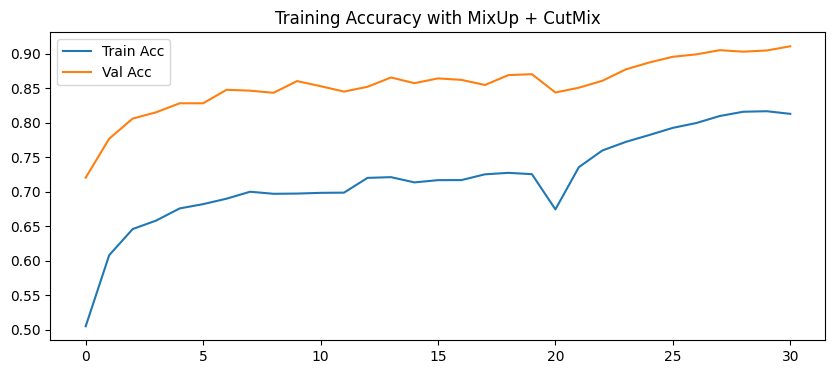

In [12]:
# =============================================================
# 🌾 PLANT DISEASE DETECTION - MobileNetV2 with MixUp + CutMix
# =============================================================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import os
import numpy as np

print(f"✅ TensorFlow Version: {tf.__version__}")
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# --- 1. CONFIG ---
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 20
FINE_TUNE_EPOCHS = 10

# --- 2. CONNECT DRIVE ---
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train_dir = "/content/plant_disease_data/Train" # Corrected path
save_dir = "/content/drive/MyDrive/plant_disease_training"
os.makedirs(save_dir, exist_ok=True)

# --- 3. DATA GENERATOR ---
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    validation_split=0.15
)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

num_classes = train_data.num_classes
print(f"✅ Classes: {num_classes}")

# --- 4. MIXUP & CUTMIX FUNCTIONS ---
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1 = np.random.gamma(concentration_1, 1, size)
    gamma_2 = np.random.gamma(concentration_0, 1, size)
    return gamma_1 / (gamma_1 + gamma_2)

def mixup(image1, label1, image2, label2, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    image = lam * image1 + (1 - lam) * image2
    label = lam * label1 + (1 - lam) * label2
    return image, label

def cutmix(image1, label1, image2, label2, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    h, w, _ = image1.shape
    rx, ry = np.random.randint(w), np.random.randint(h)
    rw, rh = int(w * np.sqrt(1 - lam)), int(h * np.sqrt(1 - lam))
    x1, y1 = np.clip(rx - rw // 2, 0, w), np.clip(ry - rh // 2, 0, h)
    x2, y2 = np.clip(rx + rw // 2, 0, w), np.clip(ry + rh // 2, 0, h)

    image = image1.copy()
    image[y1:y2, x1:x2] = image2[y1:y2, x1:x2]
    lam = 1 - ((x2 - x1) * (y2 - y1) / (w * h))
    label = lam * label1 + (1 - lam) * label2
    return image, label

def augment_batch(images, labels):
    images, labels = images.copy(), labels.copy()
    for i in range(len(images)):
        j = np.random.randint(len(images))
        if np.random.rand() > 0.5:
            images[i], labels[i] = mixup(images[i], labels[i], images[j], labels[j])
        else:
            images[i], labels[i] = cutmix(images[i], labels[i], images[j], labels[j])
    return images, labels

# --- 5. CUSTOM DATA GENERATOR WITH MIXUP/CUTMIX ---
def mixed_data_gen(generator):
    while True:
        images, labels = next(generator)
        images, labels = augment_batch(images, labels)
        yield images, labels

train_gen_mixed = mixed_data_gen(train_data)

# --- 6. MODEL ---
base_model = MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(base_model.input, output)
model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# --- 7. CALLBACKS ---
ckpt_path = os.path.join(save_dir, "mobilenetv2_mixup_cutmix_best.keras")
callbacks = [
    ModelCheckpoint(ckpt_path, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1),
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
]

# --- 8. TRAINING PHASE 1 ---
print("\n🌱 Training with MixUp + CutMix augmentation...\n")

history = model.fit(
    train_gen_mixed,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# --- 9. FINE-TUNING ---
print("\n🌾 Fine-tuning top layers...\n")
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(
    train_gen_mixed,
    steps_per_epoch=len(train_data),
    validation_data=val_data,
    epochs=EPOCHS + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1],
    callbacks=callbacks,
    verbose=1
)

# --- 10. SAVE FINAL MODEL ---
final_path = os.path.join(save_dir, "mobilenetv2_mixup_cutmix_final.keras")
model.save(final_path)
print(f"\n💾 Saved model → {final_path}")

# --- 11. EVALUATION ---
val_loss, val_acc = model.evaluate(val_data)
print(f"\n✅ Final Validation Accuracy: {val_acc*100:.2f}%")

# --- 12. PLOT ACCURACY ---
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Training Accuracy with MixUp + CutMix'); plt.show()

In [8]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [10]:
!kaggle datasets list | head


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          18012        616  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15208        356  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          19555        390  1.0              
jocke

In [ ]:
model.predict()